## **Group Members**

Group 35: Our Group is composed by:

  - Filipe Ferreira -20240741
  - Helena Duarte- 20240530
  - Iris Moreira-20240659
  - João Freire-20240528
  - Osmainy Raimundo-e20191506



## **Table of Contents**

<div class="alert alert-block alert-info">

- [1.Importing the necessary libraries](#2nd-bullet)<br>
- [2.Modelling](#2nd-bullet)<br>
- [3.Final Model](#2nd-bullet)<br>


    
</div>

# Import the dataset and the libraries

Importing the necessary libraries

In [1]:
#Basic libraries libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from itertools import combinations
from math import ceil
import time


pd.set_option('display.max_columns', None)


#Modelling
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import CategoricalNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import StackingClassifier
from sklearn.neural_network import MLPClassifier



# metrics
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import f1_score
from sklearn.metrics import recall_score
from sklearn.model_selection import ParameterSampler
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.metrics import roc_auc_score, precision_recall_curve
from sklearn.preprocessing import label_binarize
from sklearn.metrics import roc_curve, auc

import warnings
warnings.filterwarnings('ignore')



In [2]:
X_train_num = pd.read_csv("../Data/copy_X_train_num.csv", index_col="Claim Identifier")
X_train_cat = pd.read_csv("../Data/copy_X_train_cat.csv", index_col="Claim Identifier")
df_target_train = pd.read_csv("../Data/copy_target_train.csv", index_col="Claim Identifier")

In [3]:
X_val_num = pd.read_csv("../Data/copy_X_val_num.csv", index_col="Claim Identifier")
X_val_cat = pd.read_csv("../Data/copy_X_val_cat.csv", index_col="Claim Identifier")
df_target_val = pd.read_csv("../Data/copy_target_val.csv", index_col="Claim Identifier")

In [4]:
employees_test_num = pd.read_csv("../Data/copy_employees_test_num.csv", index_col="Claim Identifier")
employees_test_cat = pd.read_csv("../Data/copy_employees_test_cat.csv", index_col="Claim Identifier")

In [5]:
target_train = df_target_train['Claim Injury Type'].to_numpy()
target_val = df_target_val['Claim Injury Type'].to_numpy()

In [6]:
classes_enc2 = [
    '1. CANCELLED',
    '2. NON-COMP',
    '3. MED ONLY',
    '4. TEMPORARY',
    '5. PPD SCH LOSS',
    '6. PPD NSL',
    '7. PTD',
    '8. DEATH'
]
mapping = {i: label for i, label in enumerate(classes_enc2)}

Features that is selected before:

In [7]:
final_features_for_model = [ "Birth Year",
    "Diff_days_assembly_accident",
    "Diff_days_C2_Accident",
    "WCIO Nature of Injury Description_Frqc",
    "WCIO Part Of Body Description_Frqc",
    "Average Weekly Wage log",
    "County of Injury_Frqc",
    "Industry Code Description_Frqc",
    "District Name_Frqc",
    'Attorney/Representative', 
    'has_c3_date', 'COVID-19 Indicator', 
    'has_first_hearing_date', 'has_ime',
    'Alternative Dispute Resolution_N', 
   'Carrier Type_1A. PRIVATE',
    'Carrier Type_2A. SIF', 'Carrier Type_3A. SELF PUBLIC', 
    'Carrier Type_4A. SELF PRIVATE',
    'Medical Fee Region_I', 'Medical Fee Region_II', 
    'Medical Fee Region_III', 'Medical Fee Region_IV',
    'WCIO Part of Body Description Category_Head',
    'WCIO Part of Body Description Category_Lower Extremities', 
    'WCIO Part of Body Description Category_Multiple Body Parts',
    'WCIO Part of Body Description Category_Neck', 
    'WCIO Part of Body Description Category_Trunk',
    'WCIO Part of Body Description Category_Upper Extremities',
    'WCIO Nature of Injury Description Category_Multiple Injuries', 
    'WCIO Nature of Injury Description Category_Occupational Disease or Cumulative Injury',
    'WCIO Nature of Injury Description Category_Specific Injury', 
    'WCIO Cause of Injury Description Category_Burn or Scald - Heat or Cold Exposures - Contact With',
    'WCIO Cause of Injury Description Category_Cut, Puncture, Scrape Injured By',
    'WCIO Cause of Injury Description Category_Fall, Slip or Trip Injury', 
    'WCIO Cause of Injury Description Category_Miscellaneous Causes',
    'WCIO Cause of Injury Description Category_Motor Vehicle', 
    'WCIO Cause of Injury Description Category_Strain or Injury By',
    'WCIO Cause of Injury Description Category_Striking Against or Stepping On', 
    'WCIO Cause of Injury Description Category_Struck or Injured By', 
    'AWW_Category_Zero',
    'Gender_M']

In [8]:
select_features_cat2 = [
    'Attorney/Representative', 
    'has_c3_date', 'COVID-19 Indicator', 
    'has_first_hearing_date', 'has_ime',
    'Alternative Dispute Resolution_N', 
   'Carrier Type_1A. PRIVATE',
    'Carrier Type_2A. SIF', 'Carrier Type_3A. SELF PUBLIC', 
    'Carrier Type_4A. SELF PRIVATE',
    'Medical Fee Region_I', 'Medical Fee Region_II', 
    'Medical Fee Region_III', 'Medical Fee Region_IV',
    'WCIO Part of Body Description Category_Head',
    'WCIO Part of Body Description Category_Lower Extremities', 
    'WCIO Part of Body Description Category_Multiple Body Parts',
    'WCIO Part of Body Description Category_Neck', 
    'WCIO Part of Body Description Category_Trunk',
    'WCIO Part of Body Description Category_Upper Extremities',
    'WCIO Nature of Injury Description Category_Multiple Injuries', 
    'WCIO Nature of Injury Description Category_Occupational Disease or Cumulative Injury',
    'WCIO Nature of Injury Description Category_Specific Injury', 
    'WCIO Cause of Injury Description Category_Burn or Scald - Heat or Cold Exposures - Contact With',
    'WCIO Cause of Injury Description Category_Cut, Puncture, Scrape Injured By',
    'WCIO Cause of Injury Description Category_Fall, Slip or Trip Injury', 
    'WCIO Cause of Injury Description Category_Miscellaneous Causes',
    'WCIO Cause of Injury Description Category_Motor Vehicle', 
    'WCIO Cause of Injury Description Category_Strain or Injury By',
    'WCIO Cause of Injury Description Category_Striking Against or Stepping On', 
    'WCIO Cause of Injury Description Category_Struck or Injured By', 
    'AWW_Category_Zero',
    'Gender_M'
]

In [9]:
X_train_all = pd.concat([X_train_num, X_train_cat], axis=1)

In [10]:
X_val_all = pd.concat([X_val_num, X_val_cat], axis=1)

In [11]:
employees_test_all = pd.concat([employees_test_num,employees_test_cat], axis=1)

X_train and X_val with feature selection:

In [12]:
X_train_include = X_train_all[final_features_for_model] 
X_val_include = X_val_all[final_features_for_model]  


# Models

In This section, we will create the models for our predition and do the model assessment consecutively, the main objective is to help us undertand which models could be best for our problem based on the scores of the models.

In [13]:
#Creating a function to define the metrics for the CBN Model
def metrics(y_train, pred_train , y_val, pred_val):
    print('___________________________________________________________________________________________________________')
    print('                                                     TRAIN                                                 ')
    print('-----------------------------------------------------------------------------------------------------------')
    print(classification_report(y_train, pred_train))
    print(confusion_matrix(y_train, pred_train))


    print('___________________________________________________________________________________________________________')
    print('                                                VALIDATION                                                 ')
    print('-----------------------------------------------------------------------------------------------------------')
    print(classification_report(y_val, pred_val))
    print(confusion_matrix(y_val, pred_val))

## Categorical Naive Bayes

In [14]:
modelCNB_f_include = CategoricalNB()
modelCNB_f_include.fit(X = X_train_all[select_features_cat2], y = target_train)

CategoricalNB()

In [15]:
labels_train_f_include = modelCNB_f_include.predict(X_train_all[select_features_cat2])

In [ ]:
np.unique(labels_train_f_include)

array([0, 1, 2, 3, 4, 5, 6, 7])

In [16]:
labels_val_f=modelCNB_f_include.predict(X_val_all[select_features_cat2])

In [17]:
print(modelCNB_f_include.score(X_train_all[select_features_cat2], target_train))
print(modelCNB_f_include.score(X_val_all[select_features_cat2], target_val))

0.7020103583552247
0.70090239710118


In [18]:
metrics(target_train, labels_train_f_include, target_val, labels_val_f)

___________________________________________________________________________________________________________
                                                     TRAIN                                                 
-----------------------------------------------------------------------------------------------------------
              precision    recall  f1-score   support

           0       0.38      0.34      0.36      8717
           1       0.85      0.93      0.89    203590
           2       0.23      0.12      0.16     48128
           3       0.66      0.62      0.64    103731
           4       0.45      0.58      0.50     33723
           5       0.11      0.08      0.09      2940
           6       0.00      0.00      0.00        68
           7       0.04      0.45      0.07       325

    accuracy                           0.70    401222
   macro avg       0.34      0.39      0.34    401222
weighted avg       0.68      0.70      0.69    401222

[[  2935   4717    582   

In [19]:
cnb_results = {
    'Model:': 'CategoricalNB',
    'train accuracy': modelCNB_f_include.score(X_train_all[select_features_cat2], target_train),
    'val accuracy': modelCNB_f_include.score(X_val_all[select_features_cat2], target_val),
    'train precision': precision_score(target_train, labels_train_f_include, average='macro'),
    'train recall': recall_score(target_train, labels_train_f_include, average='macro'),
    'train_f1_macro': f1_score(target_train, labels_train_f_include, average='macro'),
    'val precision': precision_score(target_val, labels_val_f, average='macro'),
    'val recall': recall_score(target_val, labels_val_f, average='macro'),
    'val_f1_macro': f1_score(target_val, labels_val_f, average='macro')

}

results_df_cnb = pd.DataFrame([cnb_results])

results_df_cnb


,Model:,train accuracy,val accuracy,train precision,train recall,train_f1_macro,val precision,val recall,val_f1_macro
0,CategoricalNB,0.70201,0.700902,0.340116,0.389613,0.338759,0.340679,0.385573,0.338854


## Decision Tree

In [21]:
# Parameter grid for Decision Trees


param_dist = {
    'criterion': ['gini', 'entropy', 'log_loss'],
    'max_depth': [5, 10, 15, 20, None], 
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

#Create 20 random parameter combinations
n_iter = 20 
param_list = list(ParameterSampler(param_dist, n_iter=n_iter, random_state=42))

results = []

# Loop through each parameter combination
for params in param_list:
    # Record the start time
    start_time = time.time()
    
    # Initialize Decision Tree with current parameters
    model = DecisionTreeClassifier(**params, random_state=42)
    
    model.fit(X_train_include, target_train)
    
    y_pred_train = model.predict(X_train_include)
    y_pred_val = model.predict(X_val_include)
    
    train_accuracy = accuracy_score(target_train, y_pred_train)   
    val_accuracy = accuracy_score(target_val, y_pred_val)

    ## precision 
    train_precision = precision_score(target_train, y_pred_train, average='macro')
    val_precision = precision_score(target_val, y_pred_val, average='macro')
    ## recall
    train_recall = recall_score(target_train, y_pred_train, average='macro')
    val_recall = recall_score(target_val, y_pred_val, average='macro')

    train_f1_macro = f1_score(target_train, y_pred_train, average='macro')
    val_f1_macro = f1_score(target_val, y_pred_val, average='macro')
    
    end_time = time.time()
    duration = end_time - start_time
    
    results.append({
        'Model:': "Decision Tree",
        'params': params,
        'train accuracy': train_accuracy,
        'train precision': train_precision,
        'train recall': train_recall,
        'train_f1_macro': train_f1_macro,
        'val accuracy': val_accuracy,
        'val precision' : val_precision,
        'val recall': val_recall,
        'val_f1_macro': val_f1_macro,
        'time': duration
    })
    print(f"Params: {params}, F1 Macro: {val_f1_macro:.4f}, Time: {duration:.2f}s")

#Converting results to a DataFrame and sort by F1 Macro score
results_df_dt = pd.DataFrame(results).sort_values(by='val_f1_macro', ascending=False)

#best parameters and the corresponding F1 Macro score
print("\nBest Parameters Based on F1 Macro:")
print(results_df_dt.iloc[0])

results_df_dt.to_csv("decision_tree_best_results.csv", index=False)
print("\nResults saved to 'decision_tree_best_results.csv'.")

Params: {'min_samples_split': 10, 'min_samples_leaf': 4, 'max_depth': 5, 'criterion': 'log_loss'}, F1 Macro: 0.3007, Time: 2.66s
Params: {'min_samples_split': 5, 'min_samples_leaf': 2, 'max_depth': 15, 'criterion': 'entropy'}, F1 Macro: 0.4018, Time: 6.68s
Params: {'min_samples_split': 2, 'min_samples_leaf': 4, 'max_depth': 10, 'criterion': 'log_loss'}, F1 Macro: 0.3996, Time: 4.84s
Params: {'min_samples_split': 5, 'min_samples_leaf': 1, 'max_depth': 15, 'criterion': 'gini'}, F1 Macro: 0.3973, Time: 6.04s
Params: {'min_samples_split': 2, 'min_samples_leaf': 4, 'max_depth': None, 'criterion': 'gini'}, F1 Macro: 0.3881, Time: 8.92s
Params: {'min_samples_split': 10, 'min_samples_leaf': 4, 'max_depth': 10, 'criterion': 'entropy'}, F1 Macro: 0.3996, Time: 5.20s
Params: {'min_samples_split': 2, 'min_samples_leaf': 2, 'max_depth': 10, 'criterion': 'gini'}, F1 Macro: 0.3954, Time: 4.69s
Params: {'min_samples_split': 10, 'min_samples_leaf': 1, 'max_depth': 15, 'criterion': 'log_loss'}, F1 Macro

In [26]:
DT_model = DecisionTreeClassifier(
    min_samples_split=10,
    min_samples_leaf=4,
    max_depth=20,
    criterion='log_loss',
    random_state=42  
).fit(X = X_train_include, y = target_train)

In [27]:
predictions_train_dec_tree_f_include = DT_model.predict(X_train_include)
predictions_val_dec_tree_f_include = DT_model.predict(X_val_include)

In [28]:
metrics(target_train, predictions_train_dec_tree_f_include, target_val, predictions_val_dec_tree_f_include)

___________________________________________________________________________________________________________
                                                     TRAIN                                                 
-----------------------------------------------------------------------------------------------------------
              precision    recall  f1-score   support

           0       0.76      0.67      0.71      8717
           1       0.88      0.98      0.92    203590
           2       0.68      0.33      0.45     48128
           3       0.80      0.88      0.84    103731
           4       0.77      0.65      0.71     33723
           5       0.64      0.21      0.32      2940
           6       0.45      0.07      0.13        68
           7       0.77      0.50      0.61       325

    accuracy                           0.83    401222
   macro avg       0.72      0.54      0.59    401222
weighted avg       0.82      0.83      0.82    401222

[[  5841   2476    204   

<a class="anchor" id="ibl">

## Logistic Regression

</a>

In [22]:
param_dist = {
    'C': [0.01, 0.1, 1, 10, 100],  # Regularization strength
    'solver': ['liblinear', 'lbfgs', 'saga'],  # Solvers
    'max_iter': [100, 200, 500, 1000]  # Maximum iterations
}

# Initialize Logistic Regression
log_reg = LogisticRegression(random_state=42)

# Create random parameter combinations
n_iter = 20  # Number of random combinations to try
param_list = list(ParameterSampler(param_dist, n_iter=n_iter, random_state=42))

# Prepare a DataFrame to save results
results = []

# Loop through each parameter combination
for params in param_list:
    # Record the start time
    start_time = time.time()
    
    # Initialize Logistic Regression with current parameters
    model = LogisticRegression(**params, random_state=42)
    
    # Fit the model on the training set
    model.fit(X_train_include, target_train)

    y_pred_train = model.predict(X_train_include)
    y_pred_val = model.predict(X_val_include)
    
    train_accuracy = accuracy_score(target_train, y_pred_train)   
    val_accuracy = accuracy_score(target_val, y_pred_val)

    ## precision 
    train_precision = precision_score(target_train, y_pred_train, average='macro')
    val_precision = precision_score(target_val, y_pred_val, average='macro')
    ## recall
    train_recall = recall_score(target_train, y_pred_train, average='macro')
    val_recall = recall_score(target_val, y_pred_val, average='macro')

    train_f1_macro = f1_score(target_train, y_pred_train, average='macro')
    val_f1_macro = f1_score(target_val, y_pred_val, average='macro')
    
    end_time = time.time()
    duration = end_time - start_time
    
    # Save the results
    results.append({
        'Model:': "Logistic Regression",
        'train accuracy': train_accuracy,
        'train precision': train_precision,
        'train recall': train_recall,
        'train_f1_macro': train_f1_macro,
        'val accuracy': val_accuracy,
        'val precision' : val_precision,
        'val recall': val_recall,
        'val_f1_macro': val_f1_macro,
        'time': duration,
        'params': params,
    })
    print(f"Params: {params}, F1 Macro: {val_f1_macro:.4f}, Time: {duration:.2f}s")

# Convert results to a DataFrame and sort by F1 Macro score
results_df_lr = pd.DataFrame(results).sort_values(by='val_f1_macro', ascending=False)

# Display the best parameters and the corresponding F1 Macro score
print("\nBest Parameters Based on F1 Macro:")
print(results_df_lr.iloc[0])


Params: {'solver': 'liblinear', 'max_iter': 100, 'C': 0.01}, F1 Macro: 0.3172, Time: 25.78s
Params: {'solver': 'saga', 'max_iter': 200, 'C': 0.01}, F1 Macro: 0.3420, Time: 16.24s
Params: {'solver': 'liblinear', 'max_iter': 100, 'C': 10}, F1 Macro: 0.3491, Time: 127.36s
Params: {'solver': 'liblinear', 'max_iter': 1000, 'C': 10}, F1 Macro: 0.3491, Time: 131.45s
Params: {'solver': 'lbfgs', 'max_iter': 100, 'C': 0.1}, F1 Macro: 0.3579, Time: 14.98s
Params: {'solver': 'liblinear', 'max_iter': 500, 'C': 100}, F1 Macro: 0.3502, Time: 175.47s
Params: {'solver': 'liblinear', 'max_iter': 1000, 'C': 1}, F1 Macro: 0.3445, Time: 72.42s
Params: {'solver': 'liblinear', 'max_iter': 100, 'C': 100}, F1 Macro: 0.3502, Time: 182.54s
Params: {'solver': 'liblinear', 'max_iter': 100, 'C': 0.1}, F1 Macro: 0.3373, Time: 47.02s
Params: {'solver': 'liblinear', 'max_iter': 1000, 'C': 100}, F1 Macro: 0.3502, Time: 188.40s
Params: {'solver': 'lbfgs', 'max_iter': 1000, 'C': 10}, F1 Macro: 0.3945, Time: 56.98s
Params

In [41]:
logistic_model =  LogisticRegression(
    solver='saga',
    max_iter=100,
    C=100,
    random_state=42  
).fit(X = X_train_include, y = target_train)

In [42]:
predictions_train_log_model = logistic_model.predict(X_train_include)
predictions_val_log_model = logistic_model.predict(X_val_include)

In [43]:
metrics(target_train, predictions_train_log_model, target_val, predictions_val_log_model)

___________________________________________________________________________________________________________
                                                     TRAIN                                                 
-----------------------------------------------------------------------------------------------------------
              precision    recall  f1-score   support

           0       0.68      0.46      0.55      8717
           1       0.84      0.97      0.90    203590
           2       0.29      0.06      0.09     48128
           3       0.70      0.84      0.76    103731
           4       0.62      0.47      0.53     33723
           5       0.00      0.00      0.00      2940
           6       0.00      0.00      0.00        68
           7       0.42      0.23      0.29       325

    accuracy                           0.77    401222
   macro avg       0.44      0.38      0.39    401222
weighted avg       0.71      0.77      0.72    401222

[[  3991   4240    343   

## Ensemble Models

We decided to try Ensemble Models because Ensemble methods can reduce the impact of class imbalance by aggregating predictions, helping to improve classification for minority classes, which is the case of our classification. Our dataset has high class imbalance, which makes the prediction harder for the models, so we decided to try RandomForest Classifier and Gradient Boosting.

### Random Forest

In [23]:

param_dist = {
    'n_estimators': [50, 100, 200],  
    'max_depth': [10, 15, 20],       
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'max_features': ['sqrt', 'log2']
}

results = []# list to store the results

# Create random parameter combinations
n_iter = 20  # try 20 combinations
param_list = list(ParameterSampler(param_dist, n_iter=n_iter, random_state=42))

# Loop through each parameter combination
for params in param_list:
    start_time = time.time()
    # Initialize Random Forest with current parameters
    model = RandomForestClassifier(**params, random_state=42)
    
    model.fit(X_train_include, target_train)
    
    y_pred_train = model.predict(X_train_include)
    y_pred_val = model.predict(X_val_include)
    
    train_accuracy = accuracy_score(target_train, y_pred_train)   
    val_accuracy = accuracy_score(target_val, y_pred_val)

    ## precision 
    train_precision = precision_score(target_train, y_pred_train, average='macro')
    val_precision = precision_score(target_val, y_pred_val, average='macro')
    ## recall
    train_recall = recall_score(target_train, y_pred_train, average='macro')
    val_recall = recall_score(target_val, y_pred_val, average='macro')

    train_f1_macro = f1_score(target_train, y_pred_train, average='macro')
    val_f1_macro = f1_score(target_val, y_pred_val, average='macro')
    
    end_time = time.time()
    duration = end_time - start_time
    
    # Save the results
    results.append({
        'Model:': "Random Forest",
        'train accuracy': train_accuracy,
        'train precision': train_precision,
        'train recall': train_recall,
        'train_f1_macro': train_f1_macro,
        'val accuracy': val_accuracy,
        'val precision' : val_precision,
        'val recall': val_recall,
        'val_f1_macro': val_f1_macro,
        'time': duration,
        'params': params,
    })
    print(f"Params: {params}, F1 Macro: {val_f1_macro:.4f}, Time: {duration:.2f}s")

# Convert results to a DataFrame and sort by F1 Macro score
results_df_rf = pd.DataFrame(results).sort_values(by='val_f1_macro', ascending=False)

# Display the best parameters and the corresponding F1 Macro score
print("\nBest Parameters Based on F1 Macro:")
print(results_df_rf.iloc[0])

# Display the entire DataFrame of results
print("\nAll Results:")
print(results_df_rf)

Params: {'n_estimators': 200, 'min_samples_split': 5, 'min_samples_leaf': 4, 'max_features': 'log2', 'max_depth': 20}, F1 Macro: 0.3670, Time: 153.66s
Params: {'n_estimators': 100, 'min_samples_split': 2, 'min_samples_leaf': 1, 'max_features': 'sqrt', 'max_depth': 20}, F1 Macro: 0.3961, Time: 93.58s
Params: {'n_estimators': 200, 'min_samples_split': 5, 'min_samples_leaf': 4, 'max_features': 'sqrt', 'max_depth': 20}, F1 Macro: 0.3710, Time: 180.87s
Params: {'n_estimators': 100, 'min_samples_split': 2, 'min_samples_leaf': 1, 'max_features': 'sqrt', 'max_depth': 15}, F1 Macro: 0.3726, Time: 66.74s
Params: {'n_estimators': 100, 'min_samples_split': 5, 'min_samples_leaf': 2, 'max_features': 'log2', 'max_depth': 15}, F1 Macro: 0.3590, Time: 63.55s
Params: {'n_estimators': 200, 'min_samples_split': 2, 'min_samples_leaf': 1, 'max_features': 'log2', 'max_depth': 10}, F1 Macro: 0.3108, Time: 77.92s
Params: {'n_estimators': 200, 'min_samples_split': 2, 'min_samples_leaf': 4, 'max_features': 'log2

In [32]:
rf_model =  RandomForestClassifier(
    n_estimators=100,
    min_samples_split=2,
    min_samples_leaf=1,
    max_features='sqrt',
    max_depth=20,
    random_state=42  # Set random_state for reproducibility
).fit(X = X_train_include, y = target_train)

In [33]:
predictions_train_rf_model = rf_model.predict(X_train_include)
predictions_val_rf_model = rf_model.predict(X_val_include)

In [34]:
metrics(target_train, predictions_train_rf_model, target_val, predictions_val_rf_model)

___________________________________________________________________________________________________________
                                                     TRAIN                                                 
-----------------------------------------------------------------------------------------------------------
              precision    recall  f1-score   support

           0       0.89      0.72      0.79      8717
           1       0.88      0.99      0.94    203590
           2       0.99      0.35      0.51     48128
           3       0.84      0.96      0.90    103731
           4       0.93      0.79      0.85     33723
           5       1.00      0.24      0.38      2940
           6       1.00      0.38      0.55        68
           7       1.00      0.92      0.96       325

    accuracy                           0.88    401222
   macro avg       0.94      0.67      0.74    401222
weighted avg       0.89      0.88      0.86    401222

[[  6243   2405      9   

### Gradient Boosting

In [60]:
# Parameter grid for Gradient Boosting
param_dist = {
    'n_estimators': [50, 100],
    'learning_rate': [0.05, 0.1],
    'max_depth': [3, 5],
    'subsample': [0.8, 1.0]
}

n_iter = 10  #Trying 10 random combinations
param_list = list(ParameterSampler(param_dist, n_iter=n_iter, random_state=42))

results = []

# Loop through each parameter combination
for params in param_list:
    start_time = time.time()
    
    # Initialize Gradient Boosting Classifier with current parameters
    model = GradientBoostingClassifier(**params, random_state=42)
    
    model.fit(X_train_include, target_train)
    
    y_pred_train = model.predict(X_train_include)
    y_pred_val = model.predict(X_val_include)
    
    train_accuracy = accuracy_score(target_train, y_pred_train)   
    val_accuracy = accuracy_score(target_val, y_pred_val)

    ## precision 
    train_precision = precision_score(target_train, y_pred_train, average='macro')
    val_precision = precision_score(target_val, y_pred_val, average='macro')
    ## recall
    train_recall = recall_score(target_train, y_pred_train, average='macro')
    val_recall = recall_score(target_val, y_pred_val, average='macro')

    train_f1_macro = f1_score(target_train, y_pred_train, average='macro')
    val_f1_macro = f1_score(target_val, y_pred_val, average='macro')
    
    end_time = time.time()
    duration = end_time - start_time
    
    results.append({
        'Model:': "Gradient Boosting",
        'train accuracy': train_accuracy,
        'train precision': train_precision,
        'train recall': train_recall,
        'train_f1_macro': train_f1_macro,
        'val accuracy': val_accuracy,
        'val precision' : val_precision,
        'val recall': val_recall,
        'val_f1_macro': val_f1_macro,
        'time': duration,
        'params': params,
    })
    print(f"Params: {params}, F1 Macro: {val_f1_macro:.4f}, Time: {duration:.2f}s")
# Converting results to a DataFrame and sort by F1 Macro score
results_df_gb = pd.DataFrame(results).sort_values(by='val_f1_macro', ascending=False)

# the best parameters and the corresponding F1 Macro score
print("\nBest Parameters Based on F1 Macro:")
print(results_df_gb.iloc[0])

results_df_gb.to_csv("gradient_boosting_best_results.csv", index=False)
print("\nResults saved to 'gradient_boosting_best_results.csv'.")


Params: {'subsample': 0.8, 'n_estimators': 50, 'max_depth': 3, 'learning_rate': 0.05}, F1 Macro: 0.3420, Time: 293.27s
Params: {'subsample': 1.0, 'n_estimators': 50, 'max_depth': 3, 'learning_rate': 0.05}, F1 Macro: 0.3385, Time: 356.60s
Params: {'subsample': 1.0, 'n_estimators': 50, 'max_depth': 5, 'learning_rate': 0.05}, F1 Macro: 0.3911, Time: 587.98s
Params: {'subsample': 0.8, 'n_estimators': 100, 'max_depth': 5, 'learning_rate': 0.1}, F1 Macro: 0.3925, Time: 974.85s
Params: {'subsample': 1.0, 'n_estimators': 50, 'max_depth': 5, 'learning_rate': 0.1}, F1 Macro: 0.3773, Time: 592.41s
Params: {'subsample': 1.0, 'n_estimators': 100, 'max_depth': 3, 'learning_rate': 0.1}, F1 Macro: 0.3887, Time: 697.24s
Params: {'subsample': 0.8, 'n_estimators': 50, 'max_depth': 3, 'learning_rate': 0.1}, F1 Macro: 0.3748, Time: 279.89s
Params: {'subsample': 1.0, 'n_estimators': 50, 'max_depth': 3, 'learning_rate': 0.1}, F1 Macro: 0.3705, Time: 338.03s
Params: {'subsample': 0.8, 'n_estimators': 100, 'ma

<a class="anchor" id="ibl">

## Instance Based Learning

</a>

In [24]:
param_dist = {
    'n_neighbors': [3, 5],
}

n_iter = 2 
param_list = list(ParameterSampler(param_dist, n_iter=n_iter, random_state=42))

results = []

# Loop through each parameter combination
for params in param_list:
    start_time = time.time()
    
    # Initialize KNN with current parameters
    model = KNeighborsClassifier(**params)
    
    model.fit(X_train_include, target_train)
    
    y_pred_train = model.predict(X_train_include)
    y_pred_val = model.predict(X_val_include)
    
    train_accuracy = accuracy_score(target_train, y_pred_train)   
    val_accuracy = accuracy_score(target_val, y_pred_val)

    ## precision 
    train_precision = precision_score(target_train, y_pred_train, average='macro')
    val_precision = precision_score(target_val, y_pred_val, average='macro')
    ## recall
    train_recall = recall_score(target_train, y_pred_train, average='macro')
    val_recall = recall_score(target_val, y_pred_val, average='macro')

    train_f1_macro = f1_score(target_train, y_pred_train, average='macro')
    val_f1_macro = f1_score(target_val, y_pred_val, average='macro')
    
    end_time = time.time()
    duration = end_time - start_time
    
    # Save the results
    results.append({
        'Model:': "IBL",
        'train accuracy': train_accuracy,
        'train precision': train_precision,
        'train recall': train_recall,
        'train_f1_macro': train_f1_macro,
        'val accuracy': val_accuracy,
        'val precision' : val_precision,
        'val recall': val_recall,
        'val_f1_macro': val_f1_macro,
        'time': duration,
        'params': params,
    })
    print(f"Params: {params}, F1 Macro: {val_f1_macro:.4f}, Time: {duration:.2f}s")


results_df_knn = pd.DataFrame(results).sort_values(by='val_f1_macro', ascending=False)

print("\nBest Parameters Based on F1 Macro:")
print(results_df_knn.iloc[0])

results_df_knn.to_csv("knn_best_results.csv", index=False)
print("\nResults saved to 'knn_best_results.csv'.")

Params: {'n_neighbors': 3}, F1 Macro: 0.3835, Time: 374.81s
Params: {'n_neighbors': 5}, F1 Macro: 0.3929, Time: 407.95s

Best Parameters Based on F1 Macro:
Model:                            IBL
train accuracy               0.808395
train precision              0.679922
train recall                  0.44461
train_f1_macro               0.483404
val accuracy                 0.754918
val precision                0.474401
val recall                   0.373501
val_f1_macro                 0.392924
time                       407.951804
params             {'n_neighbors': 5}
Name: 1, dtype: object

Results saved to 'knn_best_results.csv'.


In [35]:
knn_model =  KNeighborsClassifier(
    n_neighbors=5
).fit(X = X_train_include, y = target_train)

In [36]:
predictions_train_knn_model = knn_model.predict(X_train_include)
predictions_val_knn_model = knn_model.predict(X_val_include)

In [37]:
metrics(target_train, predictions_train_knn_model, target_val, predictions_val_knn_model)

___________________________________________________________________________________________________________
                                                     TRAIN                                                 
-----------------------------------------------------------------------------------------------------------
              precision    recall  f1-score   support

           0       0.73      0.56      0.63      8717
           1       0.86      0.98      0.91    203590
           2       0.58      0.24      0.34     48128
           3       0.77      0.85      0.81    103731
           4       0.74      0.61      0.67     33723
           5       0.56      0.05      0.10      2940
           6       0.50      0.03      0.06        68
           7       0.70      0.23      0.35       325

    accuracy                           0.81    401222
   macro avg       0.68      0.44      0.48    401222
weighted avg       0.79      0.81      0.78    401222

[[  4871   3472    179   

## NN

In [25]:

#  Parameters for neural networks
param_dist = {
    'hidden_layer_sizes': [(64,32,16), (64, 32), (128, 64) ],
    'activation': ['relu', 'tanh'],
    'solver': ['adam', 'sgd', 'lbfgs'],
    'alpha': [0.0001, 0.001, 0.01],
    'learning_rate_init': [0.00001, 0.001, 0.01, 0.5],
    'max_iter': [50, 100]
}

n_iter = 20  #try 20 combinations
param_list = list(ParameterSampler(param_dist, n_iter=n_iter, random_state=42))

results = []

# Loop through each parameter combination
for params in param_list:
    start_time = time.time()
    
    # Initialize MLPClassifier with current parameters
    model = MLPClassifier(**params, random_state=42)
    
    model.fit(X_train_include, target_train)
    
    y_pred_train = model.predict(X_train_include)
    y_pred_val = model.predict(X_val_include)
        
    train_accuracy = accuracy_score(target_train, y_pred_train)   
    val_accuracy = accuracy_score(target_val, y_pred_val)

    ## precision 
    train_precision = precision_score(target_train, y_pred_train, average='macro')
    val_precision = precision_score(target_val, y_pred_val, average='macro')
    ## recall
    train_recall = recall_score(target_train, y_pred_train, average='macro')
    val_recall = recall_score(target_val, y_pred_val, average='macro')

    train_f1_macro = f1_score(target_train, y_pred_train, average='macro')
    val_f1_macro = f1_score(target_val, y_pred_val, average='macro')
    
    end_time = time.time()
    duration = end_time - start_time
    
    # Save the results
    results.append({
        'Model:': "NN",
        'train accuracy': train_accuracy,
        'train precision': train_precision,
        'train recall': train_recall,
        'train_f1_macro': train_f1_macro,
        'val accuracy': val_accuracy,
        'val precision' : val_precision,
        'val recall': val_recall,
        'val_f1_macro': val_f1_macro,
        'time': duration,
        'params': params,
    })
    print(f"Params: {params}, F1 Macro: {val_f1_macro}, Time: {duration:.2f}s")

# Convert results to a DataFrame and sort by F1 Macro score
results_df_nn = pd.DataFrame(results).sort_values(by='val_f1_macro', ascending=False)

# Display the best parameters and the corresponding F1 Macro score
print("\nBest Parameters Based on F1 Macro:")
print(results_df_nn.iloc[0])


Params: {'solver': 'sgd', 'max_iter': 100, 'learning_rate_init': 0.01, 'hidden_layer_sizes': (128, 64), 'alpha': 0.01, 'activation': 'tanh'}, F1 Macro: 0.4275300476152796, Time: 573.66s
Params: {'solver': 'adam', 'max_iter': 100, 'learning_rate_init': 1e-05, 'hidden_layer_sizes': (64, 32, 16), 'alpha': 0.001, 'activation': 'relu'}, F1 Macro: 0.3559067400958334, Time: 1340.96s
Params: {'solver': 'adam', 'max_iter': 50, 'learning_rate_init': 0.01, 'hidden_layer_sizes': (64, 32), 'alpha': 0.01, 'activation': 'relu'}, F1 Macro: 0.3932354319821611, Time: 149.41s
Params: {'solver': 'adam', 'max_iter': 50, 'learning_rate_init': 0.001, 'hidden_layer_sizes': (64, 32), 'alpha': 0.0001, 'activation': 'relu'}, F1 Macro: 0.42132857027648063, Time: 149.46s
Params: {'solver': 'lbfgs', 'max_iter': 50, 'learning_rate_init': 0.001, 'hidden_layer_sizes': (64, 32), 'alpha': 0.01, 'activation': 'tanh'}, F1 Macro: 0.35326260004798365, Time: 165.34s
Params: {'solver': 'lbfgs', 'max_iter': 100, 'learning_rate

In [38]:
nn_model =  MLPClassifier(
    solver='sgd',
    max_iter=100,
    learning_rate_init=0.01,
    hidden_layer_sizes=(128, 64),
    alpha=0.0001,
    activation='tanh',
    random_state=42 
).fit(X = X_train_include, y = target_train)

In [39]:
predictions_train_nn_model = nn_model.predict(X_train_include)
predictions_val_nn_model = nn_model.predict(X_val_include)

In [40]:
metrics(target_train, predictions_train_nn_model, target_val, predictions_val_nn_model)

___________________________________________________________________________________________________________
                                                     TRAIN                                                 
-----------------------------------------------------------------------------------------------------------
              precision    recall  f1-score   support

           0       0.73      0.48      0.58      8717
           1       0.85      0.98      0.91    203590
           2       0.50      0.08      0.14     48128
           3       0.73      0.83      0.78    103731
           4       0.62      0.63      0.63     33723
           5       0.33      0.00      0.00      2940
           6       0.00      0.00      0.00        68
           7       0.54      0.47      0.51       325

    accuracy                           0.79    401222
   macro avg       0.54      0.43      0.44    401222
weighted avg       0.75      0.79      0.74    401222

[[  4220   4126    182   

## DT + NN

In [47]:
# Define base models

best_params = {'criterion': 'log_loss', 'max_depth': 20, 'min_samples_leaf': 4, 'min_samples_split': 10}
DT_f_optimized = DecisionTreeClassifier(**best_params)
optimized_nn = MLPClassifier(
    solver='sgd',
    max_iter=100,
    learning_rate_init=0.01,
    hidden_layer_sizes=(128, 64),
    alpha=0.0001,
    activation='tanh',
    random_state=42
)


# Define meta-learner
meta_learner = LogisticRegression(C= 100, max_iter=100, solver= 'saga')

stacking_model_dt_nn = StackingClassifier(
    estimators=[
        ('decision_tree', DT_f_optimized),
        ('neural_network', optimized_nn)
    ],
    final_estimator=meta_learner,
    cv=None  # Reduzir o número de folds
)
start_time = time.time()
# Train stacking model
stacking_model_dt_nn.fit(X_train_include, target_train)

end_time = time.time()
duration_dt_nn = end_time - start_time

# Evaluate stacking model
predictions_train_dec_tree_f_final = stacking_model_dt_nn.predict(X_train_include)
predictions_val_dec_tree_f_final = stacking_model_dt_nn.predict(X_val_include)

train_precision_dt_nn = precision_score(target_train, predictions_train_dec_tree_f_final, average='macro')
train_recall_dt_nn = recall_score(target_train, predictions_train_dec_tree_f_final, average='macro')

val_precision_dt_nn = precision_score(target_val, predictions_val_dec_tree_f_final, average='macro')
val_recall_dt_nn = recall_score(target_val, predictions_val_dec_tree_f_final, average='macro')
metrics(target_train, predictions_train_dec_tree_f_final, target_val, predictions_val_dec_tree_f_final)

___________________________________________________________________________________________________________
                                                     TRAIN                                                 
-----------------------------------------------------------------------------------------------------------
              precision    recall  f1-score   support

           0       0.80      0.49      0.61      8717
           1       0.86      0.98      0.91    203590
           2       0.49      0.14      0.21     48128
           3       0.75      0.85      0.80    103731
           4       0.69      0.62      0.65     33723
           5       0.39      0.04      0.08      2940
           6       0.00      0.00      0.00        68
           7       0.66      0.48      0.56       325

    accuracy                           0.80    401222
   macro avg       0.58      0.45      0.48    401222
weighted avg       0.76      0.80      0.76    401222

[[  4304   4127    128   

In [48]:

dt_nn_results = {
    'Model:': 'Stacking DT+NN',
    'train accuracy': stacking_model_dt_nn.score(X_train_include, target_train),
    'train precision': train_precision_dt_nn,
    'train recall': train_recall_dt_nn,
    'train_f1_macro': f1_score(target_train, predictions_train_dec_tree_f_final, average='macro'),
    'val accuracy': stacking_model_dt_nn.score(X_val_include, target_val),
    'val precision' : val_precision_dt_nn,
    'val recall': val_recall_dt_nn,
    'val_f1_macro': f1_score(target_val,predictions_val_dec_tree_f_final , average='macro'),
    'time': duration_dt_nn,
    'params': "best DT+best NN",
}
results_df_dtnn = pd.DataFrame([dt_nn_results])

results_df_dtnn

,Model:,train accuracy,train precision,train recall,train_f1_macro,val accuracy,val precision,val recall,val_f1_macro,time,params
0,Stacking DT+NN,0.796856,0.579053,0.4512,0.478139,0.782019,0.53305,0.420959,0.446967,2785.991199,best DT+best NN


## DT + RF

In [44]:
#Based in the search made before
best_params_dt = {'criterion': 'log_loss', 'max_depth': 20, 'min_samples_leaf': 4, 'min_samples_split': 10}
best_params_rf = {'max_depth': 20, 'max_features': 'sqrt', 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 100}
best_params_lr = {'C': 100, 'max_iter': 100, 'solver': 'saga'}

In [45]:

decision_tree = DecisionTreeClassifier(**best_params_dt)

random_forest = RandomForestClassifier(**best_params_rf)

meta_learner = LogisticRegression(**best_params_lr)

stacking_model_dt_rf = StackingClassifier(
    estimators=[
        ('decision_tree', decision_tree),
        ('random_forest', random_forest)
    ],
    final_estimator=meta_learner,
)
start_time = time.time()
stacking_model_dt_rf.fit(X_train_include, target_train)

end_time = time.time()
duration_dt_rf = end_time - start_time

y_pred_val1 = stacking_model_dt_rf.predict(X_val_include)
y_pred_train1 = stacking_model_dt_rf.predict(X_train_include)

train_precision_dt_rf = precision_score(target_train, y_pred_train1, average='macro')
train_recall_dt_rf = recall_score(target_train, y_pred_train1, average='macro')

val_precision_dt_rf = precision_score(target_val, y_pred_val1, average='macro')
val_recall_dt_rf = recall_score(target_val, y_pred_val1, average='macro')

print("Stacking Model Performance (Train):\n", classification_report(target_train, y_pred_train1))
print("Stacking Model Performance (Validation):\n", classification_report(target_val, y_pred_val1))



Stacking Model Performance (Train):
               precision    recall  f1-score   support

           0       0.89      0.69      0.77      8717
           1       0.89      0.99      0.94    203590
           2       0.94      0.39      0.55     48128
           3       0.86      0.96      0.91    103731
           4       0.92      0.81      0.87     33723
           5       0.97      0.66      0.79      2940
           6       0.00      0.00      0.00        68
           7       0.98      0.99      0.98       325

    accuracy                           0.89    401222
   macro avg       0.81      0.69      0.73    401222
weighted avg       0.89      0.89      0.87    401222

Stacking Model Performance (Validation):
               precision    recall  f1-score   support

           0       0.75      0.48      0.58      3743
           1       0.85      0.97      0.91     87324
           2       0.40      0.10      0.16     20672
           3       0.71      0.87      0.79     44552

In [46]:
dt_rf_results = {
    'Model:': 'Stacking DT+RF',
    'train accuracy': stacking_model_dt_rf.score(X_train_include, target_train),
    'train precision': train_precision_dt_rf,
    'train recall': train_recall_dt_rf,
    'train_f1_macro': f1_score(target_train, y_pred_train1, average='macro'),
    'val accuracy': stacking_model_dt_rf.score(X_val_include, target_val),
    'val precision' : val_precision_dt_rf,
    'val recall': val_recall_dt_rf,
    'val_f1_macro': f1_score(target_val, y_pred_val1 , average='macro'),
    'time': duration_dt_rf,
    'params': "best DT+best RF"
}

results_df_dtrf = pd.DataFrame([dt_rf_results])

results_df_dtrf

,Model:,train accuracy,train precision,train recall,train_f1_macro,val accuracy,val precision,val recall,val_f1_macro,time,params
0,Stacking DT+RF,0.887643,0.806968,0.687775,0.726855,0.784453,0.535922,0.404721,0.431957,404.747733,best DT+best RF


# Analysis of Models and scores

In [66]:
top_nn = results_df_nn.nlargest(2, 'val_f1_macro')
top_rf = results_df_rf.nlargest(2, 'val_f1_macro')
top_gb = results_df_gb.nlargest(2, 'val_f1_macro')
top_lr = results_df_lr.nlargest(2, 'val_f1_macro')
top_knn = results_df_knn.nlargest(2, 'val_f1_macro')
top_dt = results_df_dt.nlargest(2, 'val_f1_macro')
top_cnb = results_df_cnb
top_dtnn = results_df_dtnn
top_dtrf =results_df_dtrf

pd.set_option('display.max_colwidth', None)

combined_results = pd.concat([top_nn,top_rf,top_lr,top_cnb,top_knn,top_dt,top_dtnn,top_dtrf,top_gb], ignore_index=True)

combined_results = combined_results.sort_values(by='val_f1_macro', ascending=False)

file_path = "models_combined_best_results.csv"
combined_results.to_csv(file_path, index=False)

combined_results

,Model:,train accuracy,train precision,train recall,train_f1_macro,val accuracy,val precision,val recall,val_f1_macro,time,params
11,Stacking DT+NN,0.796856,0.579053,0.451200,0.478139,0.782019,0.533050,0.420959,0.446967,2785.991199,best DT+best NN
0,NN,0.785087,0.538772,0.434737,0.442395,0.782217,0.492941,0.426753,0.436862,539.486491,"{'solver': 'sgd', 'max_iter': 100, 'learning_rate_init': 0.01, 'hidden_layer_sizes': (128, 64), 'alpha': 0.0001, 'activation': 'tanh'}"
12,Stacking DT+RF,0.887643,0.806968,0.687775,0.726855,0.784453,0.535922,0.404721,0.431957,404.747733,best DT+best RF
1,NN,0.782744,0.489614,0.418132,0.428480,0.781119,0.496173,0.413860,0.427530,573.661148,"{'solver': 'sgd', 'max_iter': 100, 'learning_rate_init': 0.01, 'hidden_layer_sizes': (128, 64), 'alpha': 0.01, 'activation': 'tanh'}"
9,Decision Tree,0.834219,0.720366,0.536814,0.585321,0.748920,0.465039,0.397682,0.417183,6.672379,"{'min_samples_split': 10, 'min_samples_leaf': 4, 'max_depth': 20, 'criterion': 'log_loss'}"
10,Decision Tree,0.807376,0.728800,0.496652,0.545446,0.769505,0.468799,0.397252,0.412962,6.687129,"{'min_samples_split': 10, 'min_samples_leaf': 1, 'max_depth': 15, 'criterion': 'log_loss'}"
4,Logistic Regression,0.768417,0.443814,0.378166,0.391903,0.769407,0.466593,0.378215,0.396649,85.357354,"{'solver': 'saga', 'max_iter': 100, 'C': 100}"
2,Random Forest,0.879521,0.941788,0.668516,0.736029,0.786531,0.535020,0.378203,0.396052,93.576521,"{'n_estimators': 100, 'min_samples_split': 2, 'min_samples_leaf': 1, 'max_features': 'sqrt', 'max_depth': 20}"
5,Logistic Regression,0.767062,0.438599,0.372316,0.385565,0.767833,0.456763,0.377715,0.394451,56.978396,"{'solver': 'lbfgs', 'max_iter': 1000, 'C': 10}"
7,IBL,0.808395,0.679922,0.444610,0.483404,0.754918,0.474401,0.373501,0.392924,407.951804,{'n_neighbors': 5}


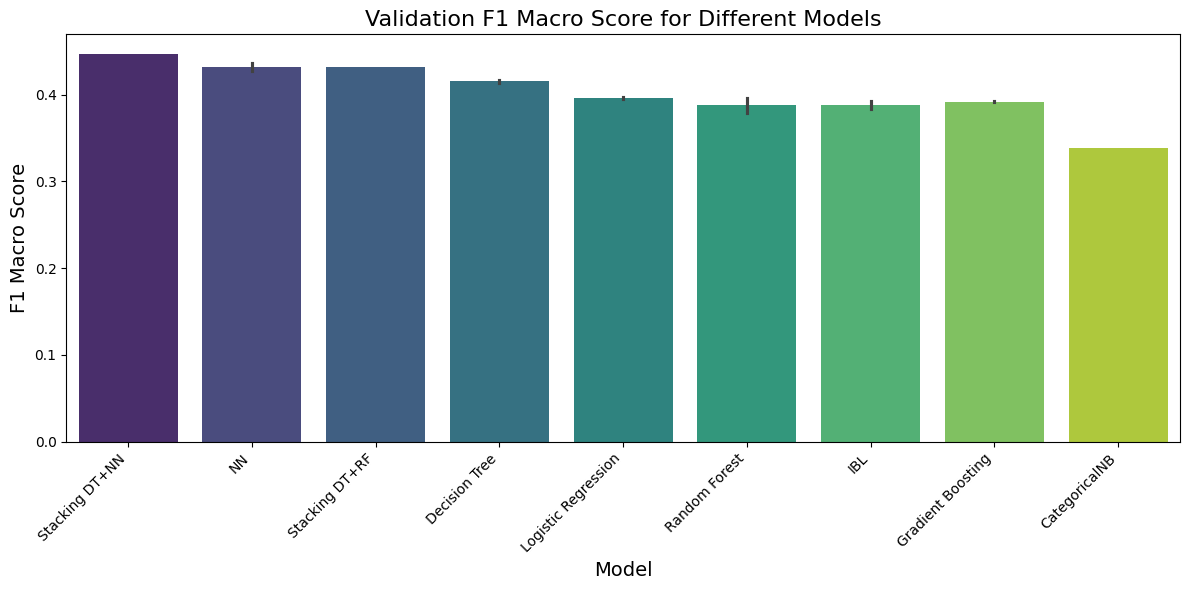

In [67]:

plt.figure(figsize=(12, 6))
sns.barplot(x="Model:", y="val_f1_macro", data=combined_results, palette="viridis")
plt.title("Validation F1 Macro Score for Different Models", fontsize=16)
plt.xlabel("Model", fontsize=14)
plt.ylabel("F1 Macro Score", fontsize=14)
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()


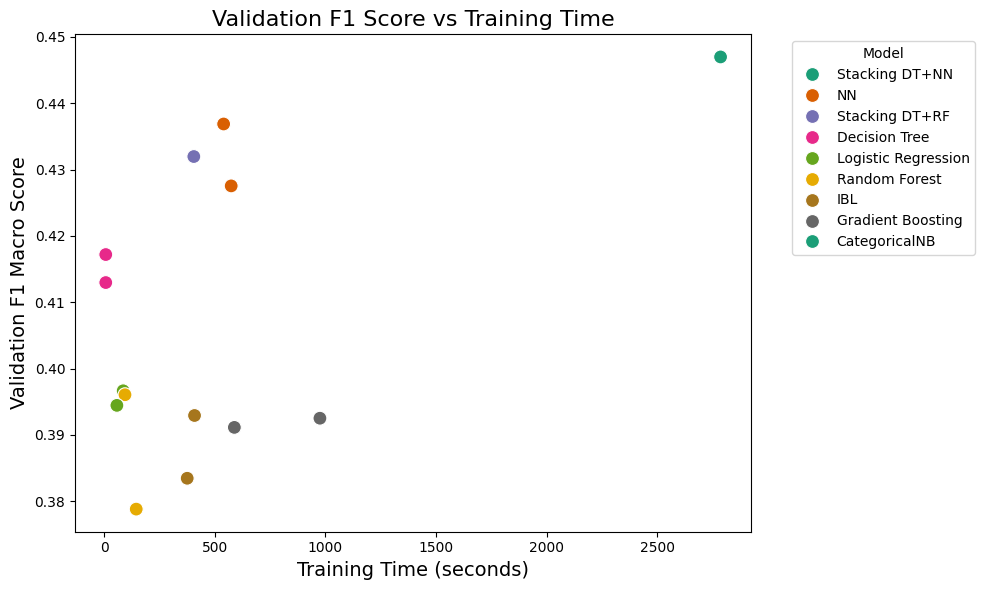

In [68]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x="time", y="val_f1_macro", hue="Model:", data=combined_results, s=100, palette="Dark2")
plt.title("Validation F1 Score vs Training Time", fontsize=16)
plt.xlabel("Training Time (seconds)", fontsize=14)
plt.ylabel("Validation F1 Macro Score", fontsize=14)
plt.legend(title="Model", bbox_to_anchor=(1.05, 1), loc="upper left")
plt.tight_layout()
plt.show()

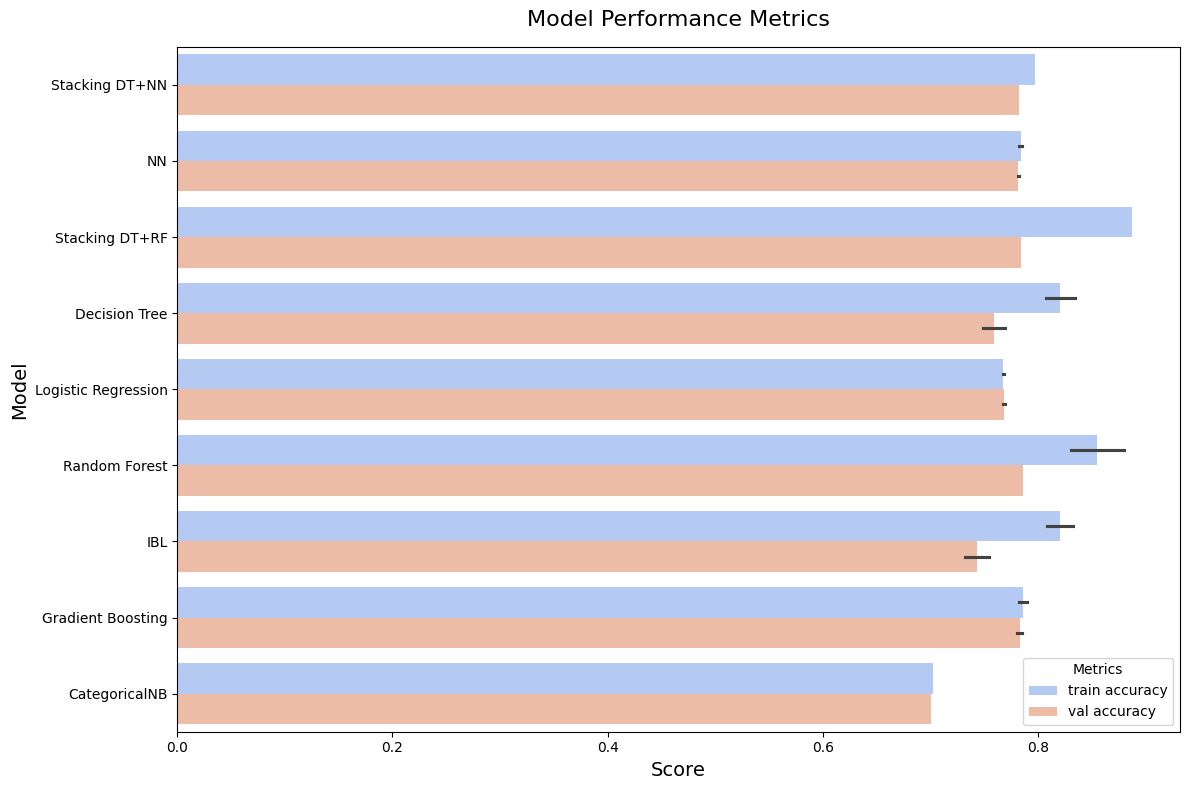

In [69]:
metrics = ["train accuracy", "val accuracy" ]
combined_results_melted = pd.melt(combined_results, id_vars=["Model:"], value_vars=metrics)

plt.figure(figsize=(12, 8))
sns.barplot(data=combined_results_melted, x="value", y="Model:", hue="variable", palette="coolwarm")
plt.title("Model Performance Metrics", fontsize=16, pad=15)
plt.xlabel("Score", fontsize=14)
plt.ylabel("Model", fontsize=14)
plt.legend(title="Metrics", loc="lower right")
plt.tight_layout()
plt.show()

Overfitting Models: Stacking DT+RF, Random Forest, Decision Tree and IBL (KNN) show the most signs of overfitting due to the significant train-validation gap.

# Final Model

In [61]:
nn_model =  MLPClassifier(
    solver='sgd',
    max_iter=100,
    learning_rate_init=0.01,
    hidden_layer_sizes=(128, 64),
    alpha=0.0001,
    activation='tanh',
    random_state=42  # Ensures reproducibility
).fit(X = X_train_include, y = target_train)

#Make predictions
predictions_train_nn_model = nn_model.predict(X_train_include)
predictions_val_nn_model = nn_model.predict(X_val_include)


In [62]:

proba_train = nn_model.predict_proba(X_train_include)
proba_val = nn_model.predict_proba(X_val_include) 
auroc_train = roc_auc_score(target_train, proba_train, multi_class='ovo') ## one versus rest
auroc_val = roc_auc_score(target_val, proba_val, multi_class='ovo')


In [63]:
# Evaluate the model
print("Training Set Metrics:")
print(classification_report(target_train, predictions_train_nn_model))
print(f'AUROC (Train): {auroc_train:.2f}')

print("\nValidation Set Metrics:")
print(classification_report(target_val, predictions_val_nn_model))
print(f'AUROC (Validation): {auroc_val:.2f}')

Training Set Metrics:
              precision    recall  f1-score   support

           0       0.73      0.48      0.58      8717
           1       0.85      0.98      0.91    203590
           2       0.50      0.08      0.14     48128
           3       0.73      0.83      0.78    103731
           4       0.62      0.63      0.63     33723
           5       0.33      0.00      0.00      2940
           6       0.00      0.00      0.00        68
           7       0.54      0.47      0.51       325

    accuracy                           0.79    401222
   macro avg       0.54      0.43      0.44    401222
weighted avg       0.75      0.79      0.74    401222

AUROC (Train): 0.90

Validation Set Metrics:
              precision    recall  f1-score   support

           0       0.72      0.49      0.58      3743
           1       0.84      0.98      0.91     87324
           2       0.47      0.08      0.13     20672
           3       0.73      0.83      0.78     44552
           

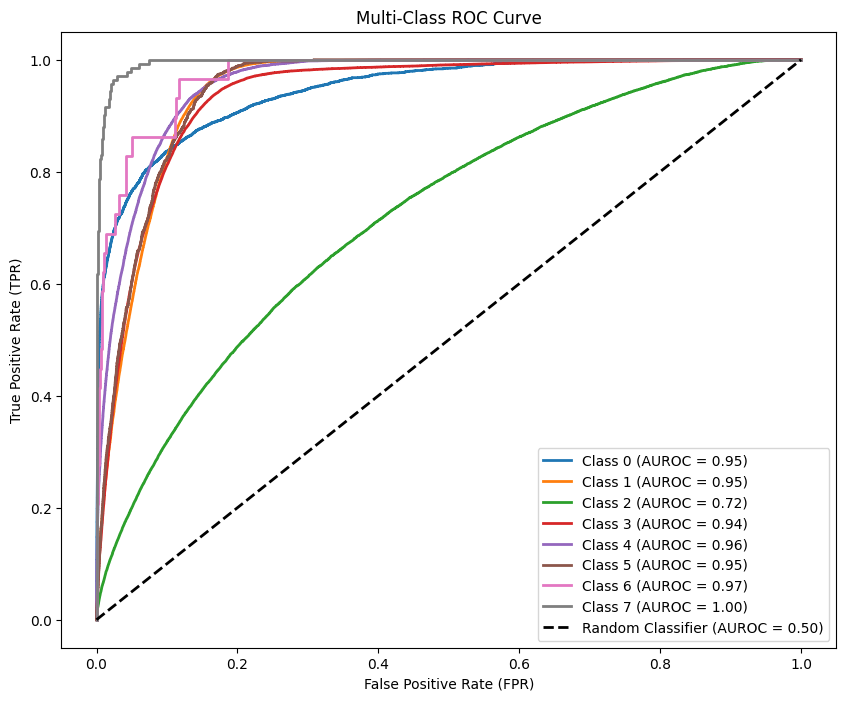

In [64]:
n_classes = proba_val.shape[1]  # Number of classes (3 in this case)
target_binarized = label_binarize(target_val, classes=np.arange(n_classes))  # Shape (n_samples, n_classes)

# Step 2: Plot the ROC curve for each class
plt.figure(figsize=(10, 8))

for i in range(n_classes):
    fpr, tpr, _ = roc_curve(target_binarized[:, i], proba_val[:, i])  # Get FPR, TPR for this class
    roc_auc = auc(fpr, tpr)  # Calculate AUROC for this class
    plt.plot(fpr, tpr, lw=2, label=f'Class {i} (AUROC = {roc_auc:.2f})')

plt.plot([0, 1], [0, 1], 'k--', lw=2, label='Random Classifier (AUROC = 0.50)')  # Diagonal line
plt.xlabel('False Positive Rate (FPR)')
plt.ylabel('True Positive Rate (TPR)')
plt.title('Multi-Class ROC Curve')
plt.legend(loc='lower right')
plt.show()

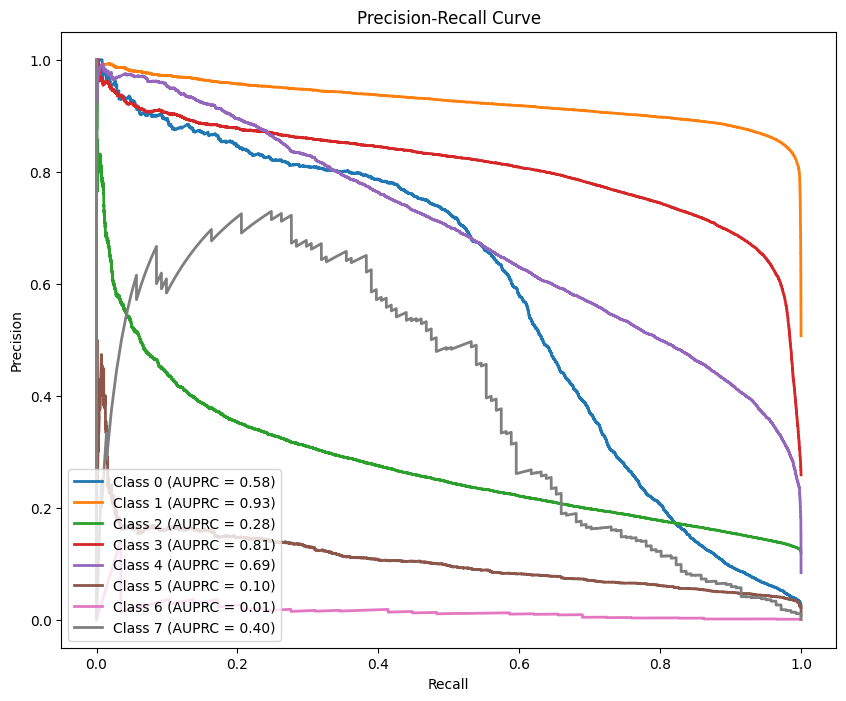

In [65]:
plt.figure(figsize=(10, 8))
for i in range(n_classes):
    precision, recall, _ = precision_recall_curve(target_binarized[:, i], proba_val[:, i])
    plt.plot(recall, precision, lw=2, label=f'Class {i} (AUPRC = {auc(recall, precision):.2f})')

plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve')
plt.legend(loc='lower left')
plt.show()

#### Exporting to Kaggle

In [58]:
y_test_predictions_v10 = nn_model.predict(employees_test_all[final_features_for_model])
predicted_labels_v10 = [mapping[pred] for pred in y_test_predictions_v10]

In [59]:
final_res_v11 = pd.DataFrame([employees_test_all.index.T, predicted_labels_v10]).T
final_res_v11.columns = ['Claim Identifier','Claim Injury Type']

final_res_v11.to_csv('Group35_Version36.csv', index = None)